<a href="https://colab.research.google.com/github/Ankitha016/PROJECT_5thsem/blob/main/Numbers_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
!pip install tensorflow-plot

  Using cached Pillow-8.2.0-cp38-cp38-win_amd64.whl (2.2 MB)
  Created wheel for tensorflow-plot: filename=tensorflow_plot-0.3.2-py3-none-any.whl size=25944 sha256=c5b268513d5cece7c8070a43773cd89b9003a8112ed061e735ea46d60b1baf84
  Stored in directory: c:\users\akanksha\appdata\local\pip\cache\wheels\aa\ea\38\edf8c9f0afd64997e506bfadd5f516e158f026457d288a81d1
  Created wheel for biwrap: filename=biwrap-0.1.6-py3-none-any.whl size=3383 sha256=11828a25c6da6bb2064a61aede5eb9cc78a80f39781dc9239aaf770a1dac42b9
  Stored in directory: c:\users\akanksha\appdata\local\pip\cache\wheels\3b\a0\22\ae589e517233c1acf3b2758a6a2a90581ee880369307084693
Successfully built tensorflow-plot biwrap


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
folder_path = "C:\\Users\\Akanksha\\Desktop\\Project Work - 4\\Handwritten-EqSolver-master\\data\\extracted_images"
files = glob(folder_path + '/*/*.jpg')
print(len(files))

47827


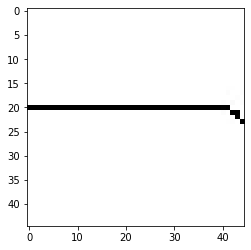

In [ ]:
from matplotlib import pyplot as plt
# randomly see any image
img = cv2.imread(files[4001])
plt.imshow(img)
plt.show()



In [ ]:
# build the CNN architecture for the model
i = Input(shape=(32,32,1))
x = Conv2D(32, (3,3), padding='same', activation='relu')(i)
x = MaxPool2D((2,2))(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(14, activation='softmax')(x)

model = Model(i,x)

In [ ]:
gen = ImageDataGenerator(rescale=1/255.0)

In [ ]:

train_gen = gen.flow_from_directory(folder_path,
                                    target_size = (32,32),
                                    color_mode = 'grayscale',
                                    class_mode = 'categorical',
                                    batch_size= 64,
                                    shuffle=True)

Found 47827 images belonging to 14 classes.


In [ ]:
!pip install pillow

In [ ]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
import keras


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

r = model.fit_generator(train_gen,
                        steps_per_epoch = len(train_gen.filenames)//64,
                        epochs = 10,
                        )

C:\Users\Akanksha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
747/747 [==============================] - 2494s 3s/step - loss: 1.0365 - accuracy: 0.6681
Epoch 2/10
747/747 [==============================] - 954s 1s/step - loss: 0.1424 - accuracy: 0.9578
Epoch 3/10
747/747 [==============================] - 59s 79ms/step - loss: 0.0850 - accuracy: 0.9742
Epoch 4/10
747/747 [==============================] - 186s 248ms/step - loss: 0.0649 - accuracy: 0.9804
Epoch 5/10
747/747 [==============================] - 77s 103ms/step - loss: 0.0485 - accuracy: 0.9860
Epoch 6/10
747/747 [==============================] - 83s 111ms/step - loss: 0.0394 - accuracy: 0.9881
Epoch 7/10
747/747 [==============================] - 78s 105ms/step - loss: 0.0358 - accuracy: 0.9882
Epoch 8/10
747/747 [==============================] - 66s 88ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 9/10
747/747 [==============================] - 66s 88ms/step - loss: 0.0308 - accuracy: 0.9896
Epoch 10/10
747/747 [==============================] - 67s 90ms/step - loss: 0

In [ ]:
model.save("C:\\Users\\owner\\Desktop\\Handwritten-EqSolver-master\\num_detect99.h5")

In [ ]:
train_gen.class_indices

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'forward_slash': 12,
 'times': 13}